In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("../data/Data_Ntraj.xlsx")  # On va peut-être partir des données prétraité pour utiliser le travail de Louise
data2 = pd.read_csv("../data_pretraitee/data_pretraite_J5.csv", sep=';', index_col = 0)

In [68]:
col = ["N2O","Date","Bande","month","year"]

In [69]:
df = data2[col] # Sélection des colonnes qui vont nous être utile

In [70]:
df.head()

,N2O,Date,Bande,month,year
0,18.537129,2018-03-14,acs,3,2018
1,2.088998,2018-03-14,pn,3,2018
2,1.488817,2018-03-14,bi,3,2018
3,1.390654,2018-03-14,bio,3,2018
4,3.297613,2018-03-14,elev,3,2018


In [20]:
# pd.DataFrame(data=data)  # Tu l'ouvres déjà avec panda pas besoin de le transformer en dataframe s'en est déjà un

In [21]:
# data.describe()

In [22]:
# data.info()

In [23]:
# import re
# for i in range(2871):             # Ne pas mettre de valeur fix, si tu veux la taille d'un df : data.shape[0]  ou len(data.Bande)
#     if data.iloc[i,0]=="BIO":     # Tu peux directement faire le for sur la col d'intérêt ex : for name in data.Bande
#         data.iloc[i,0]="Bio"      
# # data["Bande"].replace(to_replace=r'BIO.$', value='Bio', regex=True)   # T'étais sur la bonne piste !
# print(data.shape[0])
# data.Bande = data.Bande.replace('BIO', 'Bio')
# data['Bande']
# data.Bande

In [24]:
# data_new=data     
# data_new=data.drop_duplicates()
# data_new.info()
# dupli_all=data_new.duplicated()
# pd.DataFrame(data=dupli_all)
# list=[]
# for i in range(2769):
#     if dupli_all.iloc[i]==True:
#         list.append(i)
# print(list)

In [25]:
# for i in range(2871):
#     data_new.iloc[i,1]=str(data_new.iloc[i,1])              # C'est déjà un datetime pourquoi faire cette manip ?
#     data_new.iloc[i,1]=pd.Timestamp(data_new.iloc[i,1])
# pd.DataFrame(data=data_new)                                  # Déjà un dataframe



In [26]:
# data_new2=data_new[data_new.Bande!='XXX']                 # On va faire toute la manip en une ligne
# print(data_new2)
# data_new3=data_new2.dropna(subset=['N2O gN.ha-1.j-1'])
# pd.DataFrame(data=data_new3)                              # Il va pas disparaitre ton dataframe tkt
# data_new = data[data.Bande!='XXX'].dropna(subset=['N2O gN.ha-1.j-1'])

In [27]:
# data_new4=data.reset_index(drop = True)                         # On va pas avoir besoin des indexs
# pd.DataFrame(data=data_new4)


In [28]:
# corriger valeur aberrante elevage
# print(data_new.iloc[220,9])
# print(data_new4['N2O gN.ha-1.j-1'].max())
# data_new4[data_new4['N2O gN.ha-1.j-1']==data_new4['N2O gN.ha-1.j-1'].max()].index
# print(data_new.iloc[220,9])
# data_new4.iloc[220,9]=17.474219580248
# print(data_new.iloc[220,9])
# data_new4[data_new4['N2O gN.ha-1.j-1']==data_new4['N2O gN.ha-1.j-1'].max()].index
# print(data_new.iloc[30,9])

In [29]:
# Pas besoin de travailler en boucle sur un dataframe il y a beaucoup de fonction déjà fait en C qui le font plus vite
# pour convertir un datetime en year ou month  utiliser la propriété data['nom col'].dt.year par exemple

# data_new4=data_new4.assign(year=lambda x: x.Date)
# data_new4=data_new4.assign(Month=lambda x: x.Date)
# pd.DataFrame(data=data_new4)
# for i in range (385):
#     data_new4.iloc[i,18]=data_new4.iloc[i,18].year
#     data_new4.iloc[i,19]=data_new4.iloc[i,19].month
    


In [74]:
df.head()

,N2O,Date,Bande,month,year
0,18.537129,2018-03-14,acs,3,2018
1,2.088998,2018-03-14,pn,3,2018
2,1.488817,2018-03-14,bi,3,2018
3,1.390654,2018-03-14,bio,3,2018
4,3.297613,2018-03-14,elev,3,2018


In [76]:
df.Date= pd.to_datetime(df.Date, format='%Y-%m-%d')
# df['Month'] = df.Date.dt.month
# df['year'] = df.Date.dt.year

/tmp/ipykernel_17948/904739906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date= pd.to_datetime(df.Date, format='%Y-%m-%d')


In [32]:
# data_new4_count=data_new4["N2O gN.ha-1.j-1"].count()
# print(data_new4_count)
# pd.DataFrame(data=data_new4_count)

In [78]:
print(df.N2O.mean())

3.8825638023633453


Bon il a une différence entre la valeur moyenne des données prétraitées et des données brutes sur lesquelles tu es partie. \
Je jeterai un oeil plus en détail au prétraitement mais je pense qu'il faut qu'on parte du même jeu de donnée pour comparer.

In [34]:
# data_new4_mean=data_new4["N2O gN.ha-1.j-1"].mean()
# print(data_new4_mean)


In [80]:
df_gb_year_mean = pd.DataFrame(df.groupby(['year']).mean().iloc[:, :1])
df_gb_year_std = pd.DataFrame(df.groupby(['year']).std().iloc[:, :1])
df_gb_bande_count = pd.DataFrame(df.groupby(['Bande']).count().iloc[:, :1])
df_gb_bande_mean = pd.DataFrame(df.groupby(['Bande']).mean().iloc[:, :1])
df_gb_bande_std = pd.DataFrame(df.groupby(['Bande']).mean().iloc[:, :1])
df_gb_bande_year_count = pd.DataFrame(df.groupby(['Bande', 'year']).count().iloc[:, :1])
df_gb_bande_year_mean = pd.DataFrame(df.groupby(['Bande', 'year']).mean().iloc[:, :1])
df_gb_bande_year_std = df.groupby(['Bande', 'year']).std().iloc[:, :1]
df_gb_bande_mean_2_std = df_gb_bande_mean + 2 * df_gb_bande_std
df_gb_bande_year_mean_2_std = df_gb_bande_year_mean + 2 * df_gb_bande_year_std

In [36]:
# data_new4_byyear_mean=data_new4.groupby(['year']).mean()
# data_new4_byyear_mean=data_new4_byyear_mean["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_byyear_mean)


In [37]:
# data_new4_std=data_new4["N2O gN.ha-1.j-1"].std()
# print(data_new4_std)

In [38]:
# data_new4_byyear_std=data_new4.groupby(['year']).std()
# data_new4_byyear_std=data_new4_byyear_std["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_byyear_std)

In [39]:
# data_new4_bybande_count=data_new4.groupby(['Bande']).count()
# data_new4_bybande_count=data_new4_bybande_count["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_bybande_count)


In [40]:
# data_new4_bybandeyear_count=data_new4.groupby(['Bande', 'year']).count()
# data_new4_bybandeyear_count=data_new4_bybandeyear_count["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_bybandeyear_count)


In [41]:
# data_new4_bybande_mean=data_new4.groupby(['Bande']).mean()
# data_new4_bybande_mean=data_new4_bybande_mean["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_bybande_mean)
# print(data_new4_bybande_mean['ACS'])

In [42]:
# data_new4_bybandeyear_mean=data_new4.groupby(['Bande', 'year']).mean()
# data_new4_bybandeyear_mean=data_new4_bybandeyear_mean["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_bybandeyear_mean)
# print(data_new4_bybandeyear_mean['ACS',2018])


In [43]:
# data_new4_bybande_std=data_new4.groupby(['Bande']).std()
# data_new4_bybande_std=data_new4_bybande_std["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_bybande_std)


In [44]:
# data_new4_bybandeyear_std=data_new4.groupby(['Bande', 'year']).std()
# data_new4_bybandeyear_std=data_new4_bybandeyear_std["N2O gN.ha-1.j-1"]
# pd.DataFrame(data=data_new4_bybandeyear_std)

In [45]:
# data_new4_bybande_mean2std=data_new4_bybande_mean + 2*data_new4_bybande_std
# pd.DataFrame(data=data_new4_bybande_mean2std)

In [46]:
# data_new4_bybandeyear_mean2std=data_new4_bybandeyear_mean + 2*data_new4_bybandeyear_std
# pd.DataFrame(data=data_new4_bybandeyear_mean2std)


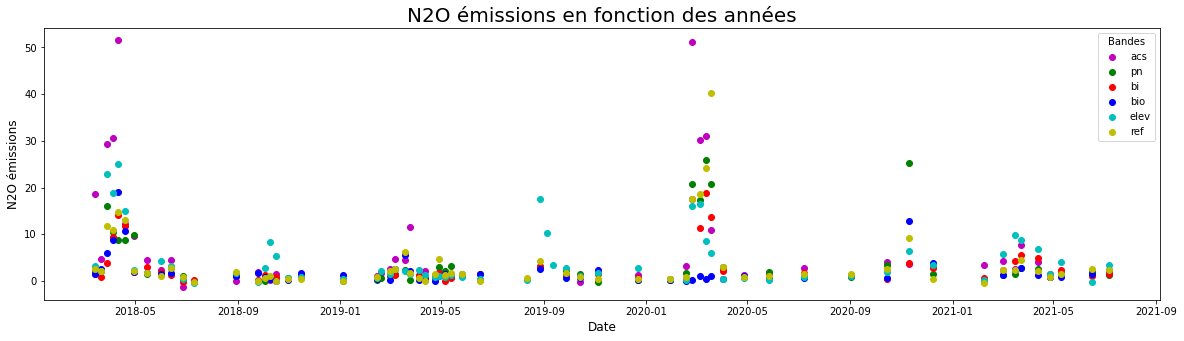

In [81]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
plt.title("N2O émissions en fonction des années", fontsize = 20)
plt.ylabel('N2O émissions', fontsize = 12) 
plt.xlabel('Date', fontsize = 12) 

markers = ['mo', 'go', 'ro', 'bo', 'co', 'yo']
for index, bande in enumerate(df.Bande.unique()):
    x = df.loc[df.Bande == bande, "Date"]
    y = df.loc[df.Bande == bande, "N2O"]
    plt.plot(x, y, markers[index])

plt.legend(df.Bande.unique(), title="Bandes")
plt.show()
# fig.savefig('allbands.jpg')

In [49]:
# import matplotlib.pyplot as plt

# N2O=data_new4[['Bande', "Date", "N2O gN.ha-1.j-1"]]
# x_acs=N2O.loc[N2O['Bande']=="ACS", "Date"]
# y_acs=N2O.loc[N2O['Bande']=="ACS", "N2O gN.ha-1.j-1"]    
# x_bi=N2O.loc[N2O['Bande']=="BI", "Date"]
# y_bi=N2O.loc[N2O['Bande']=="BI", "N2O gN.ha-1.j-1"]    
# x_bio=N2O.loc[N2O['Bande']=="Bio", "Date"]
# y_bio=N2O.loc[N2O['Bande']=="Bio", "N2O gN.ha-1.j-1"]  
# x_el=N2O.loc[N2O['Bande']=="Elev", "Date"]
# y_el=N2O.loc[N2O['Bande']=="Elev", "N2O gN.ha-1.j-1"]    
# x_pn=N2O.loc[N2O['Bande']=="PN", "Date"]
# y_pn=N2O.loc[N2O['Bande']=="PN", "N2O gN.ha-1.j-1"]    
# x_ref=N2O.loc[N2O['Bande']=="Ref", "Date"]
# y_ref=N2O.loc[N2O['Bande']=="Ref", "N2O gN.ha-1.j-1"]    
# fig=plt.figure(figsize=(35, 10))
# plt.ylabel('N2O emission') 
# plt.xlabel('Date')
# plt.plot(x_acs, y_acs, 'mo', marker="*")
# plt.plot(x_bi, y_bi, 'go', marker="*")
# plt.plot(x_bio, y_bio, 'ro', marker="x")
# plt.plot(x_el, y_el, 'bo', marker="+")
# plt.plot(x_pn, y_pn, 'co', marker="+")
# plt.plot(x_ref, y_ref, 'yo', marker="x")

# plt.legend(["ACS", "BI", "Bio", "Elev", "PN", "Ref"])
# plt.ylim([0, 100])
# fig.savefig('allbands.jpg')

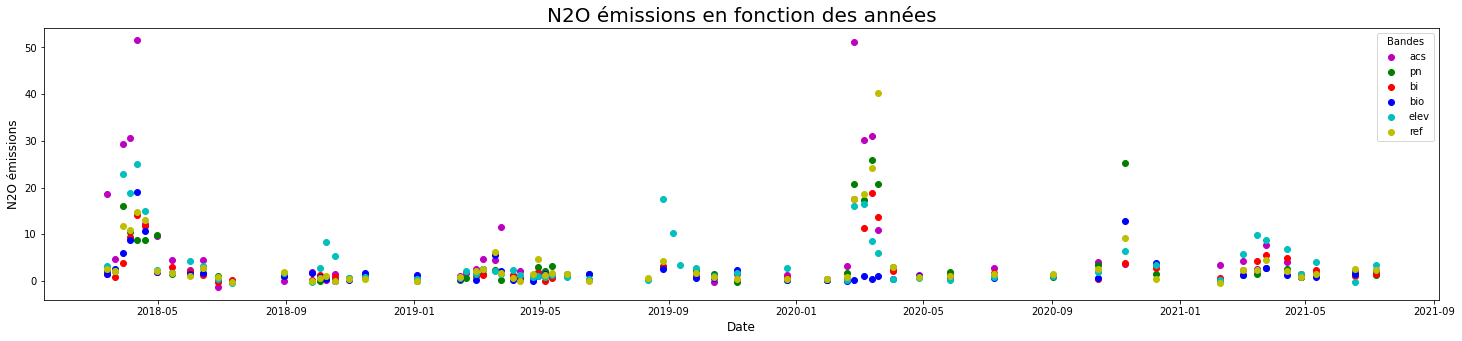

In [82]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(25, 5))
plt.title("N2O émissions en fonction des années", fontsize = 20)
plt.ylabel('N2O émissions', fontsize = 12) 
plt.xlabel('Date', fontsize = 12) 

markers = ['mo', 'go', 'ro', 'bo', 'co', 'yo']
for index, bande in enumerate(df.Bande.unique()):
    x = df.loc[df.Bande == bande, "Date"]
    y = df.loc[df.Bande == bande, "N2O"]
    plt.plot(x, y, markers[index])

plt.legend(df.Bande.unique(), title="Bandes")
plt.show()

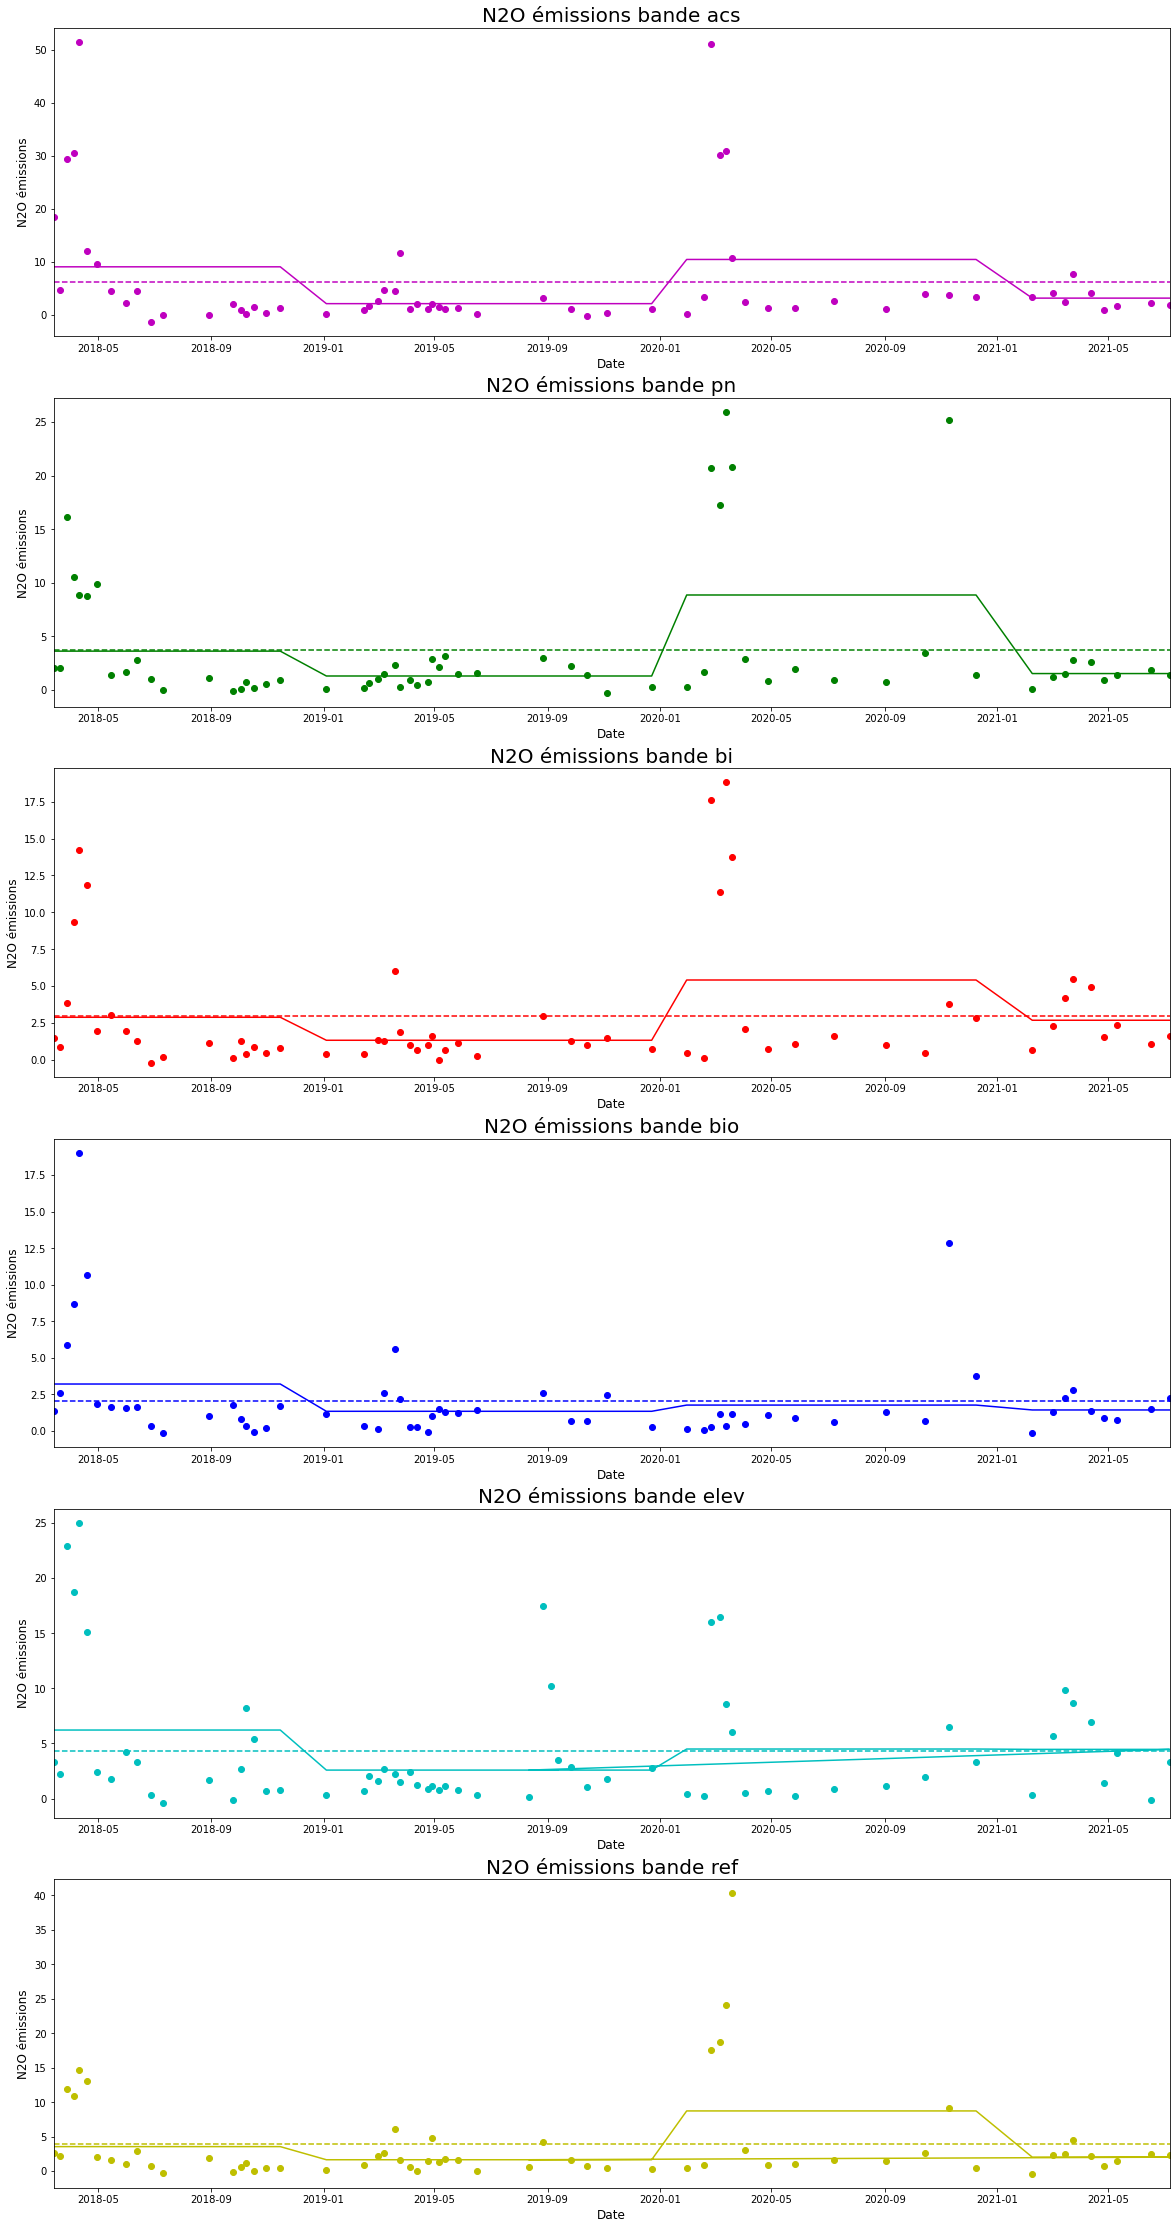

In [83]:
markers = ['m', 'g', 'r', 'b', 'c', 'y']

fig = plt.figure(figsize=(20, 15))

for index, bande in enumerate(df.Bande.unique()):

    plt.subplot(6,1,index + 1)
    plt.subplots_adjust(bottom = 1, top = 3) 
    plt.title("N2O émissions bande " + bande, fontsize = 20)
    plt.ylabel('N2O émissions', fontsize = 12) 
    plt.xlabel('Date', fontsize = 12) 

    x = df.loc[df.Bande== bande, "Date"]
    y = df.loc[df.Bande == bande, "N2O"]
    plt.plot(x, y, str(markers[index] + 'o'))

    plt.axhline(y.mean(), color = markers[index], linestyle="--")  # Moyenne

    dt_t = df.loc[df.Bande == bande, ["Date", "N2O"]]
    dt_t['year'] = dt_t.Date.dt.year    # Rajout d'une colonne year
    dt_mean = dt_t.groupby('year', axis = 0).mean() # On récupère la valeur moyenne par année
    y_mean = dt_t['year'].map(dt_mean['N2O']) # On map les valeurs sur le dataframe d'origine
    plt.plot(x, y_mean, color = markers[index], linestyle="-")  # Moyenne par année
    plt.xlim([dt_t.Date.min(), dt_t.Date.max()])



In [52]:
# df_mean = pd.DataFrame(df.groupby(['year']).mean().iloc[:, :1])
# xy = pd.DataFrame(list(zip(x, y)), 
#                columns =['Date', 'N2O']) 

# xy.Date = xy.Date.dt.year
# print(xy.groupby(xy['Date'].dt.year).mean().se)
# y_mean = pd.DataFrame(xy.groupby(xy['Date'].dt.year).mean().index.values)
# x_mean = pd.DataFrame(xy.groupby(xy['Date'].dt.year).mean().N2O.values)
# print(x_mean)
# .reset_index(inplace=True)
# print(y.head(),x.head())


# Moyenne par année
# Moyenne par année

# Moyenne par année
# x_avg = df.loc[df.Bande == 'acs', ["Date", "N2O"]].groupby("Date").mean().reset_index()
# y_avg = x_avg["N2O"]
# x_avg_yearly = x_avg.groupby(x_avg["Date"].dt.year).mean().reset_index()
# y_avg_yearly = x_avg_yearly["N2O"]
# print(x_avg_yearly["Date"])
# plt.plot(x_avg_yearly["Date"], y_avg_yearly, str(markers[2] + '-'))

# plt.plot(x_mean.values, y_mean, color = 'red')
# plt.plot(x_m2sd, y_m2sd_y, str(markers[1] + '-'))
# x_mean = df.loc[df.Bande == 'acs', "Date"].mean()
# y_mean = df.loc[df.Bande == 'acs', "N2O"].mean()
# pd.DataFrame(df.groupby(['Bande', 'year']).count().iloc[:, :1])
# print(y_mean)
# plt.plot(x_mean, y_mean, str(markers[1] + '--'))

[Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'), Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00')] [6.302682760911954, 6.302682760911954, 6.302682760911954, 6.302682760911954, 6.302682760911954, 6.302682760911954, 6.302682760911954, 6.302682760911954]


C:\Users\jacqueno\AppData\Local\Temp\ipykernel_22180\3214816666.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "mo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_acs, y_acs, 'mo', marker="*")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_22180\3214816666.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_bi, y_bi, 'go', marker="*")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_22180\3214816666.py:51: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_bio, y_bio, 'ro', marker="x")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_22180\3214816666.py:68: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marke

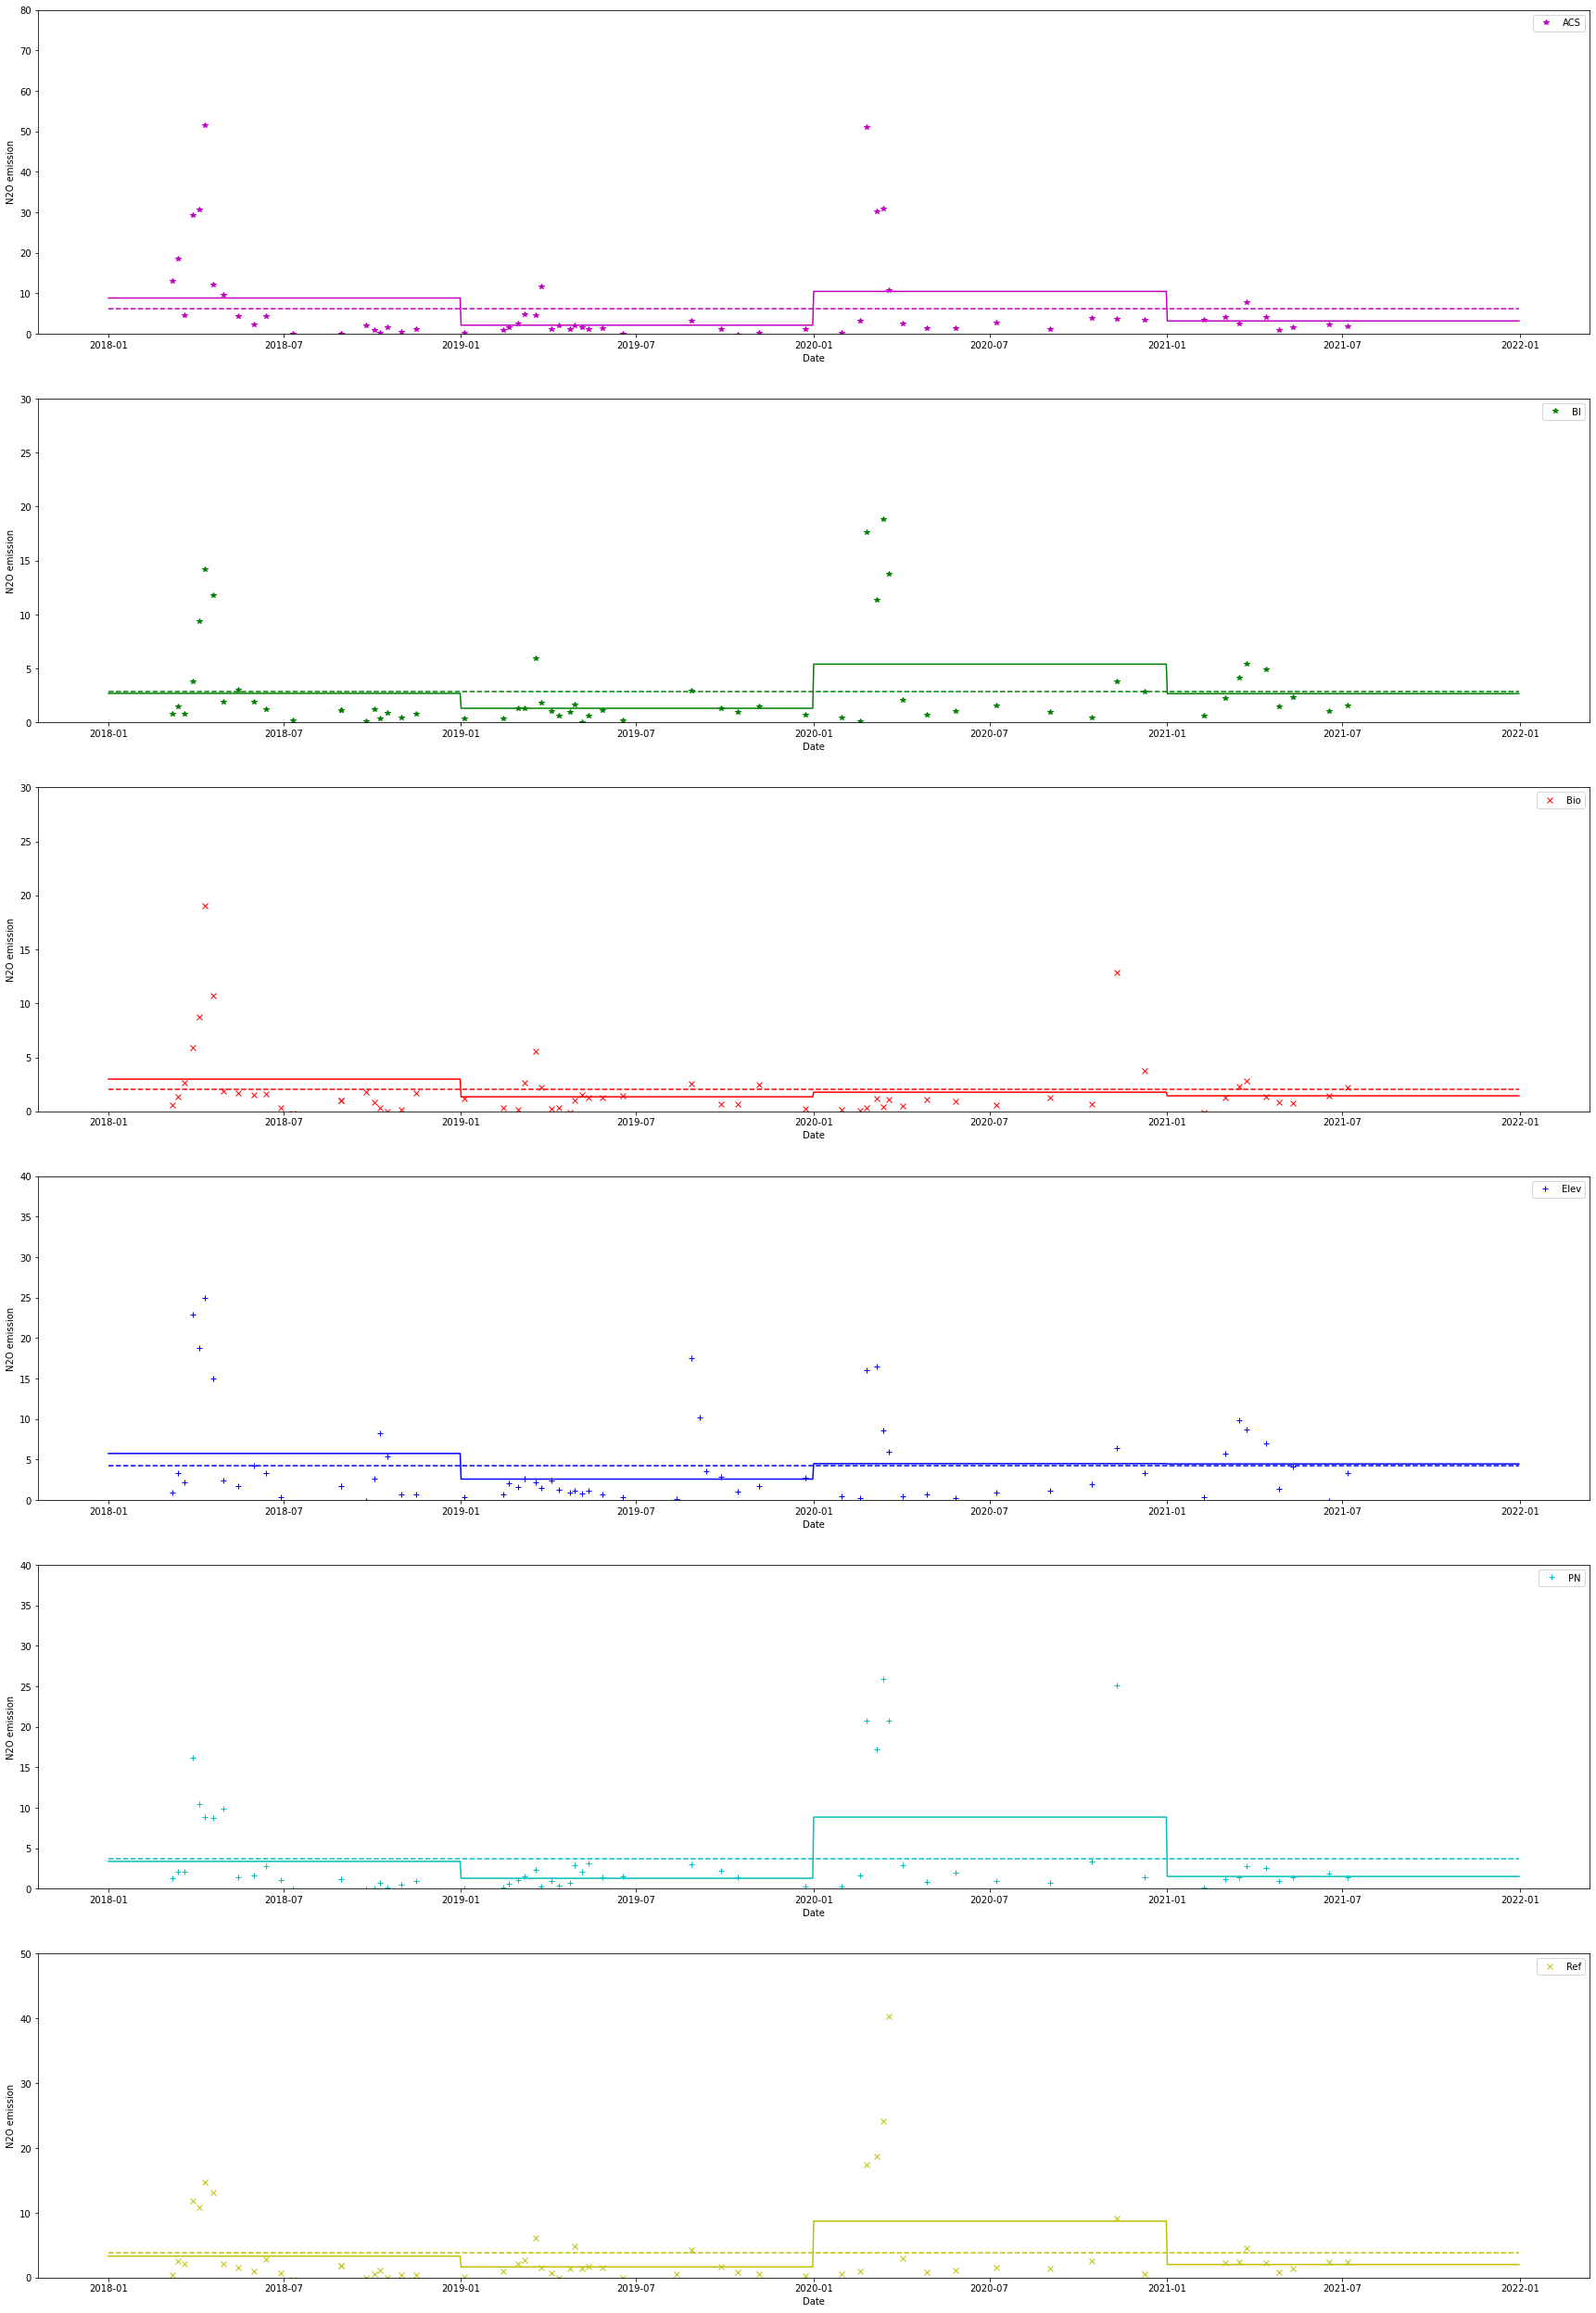

In [ ]:
# utiliser les moyennes au lieu des moyennes +2SD
x_m2sd=[]
y_m2sd_y=[]
y_m2sd=[]
for i in ["2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31", "2020-01-01", "2020-12-31", "2021-01-01", "2021-12-31"]:
    x_m2sd.append(pd.Timestamp(i))
y_m2sd_y=[data_new4_bybandeyear_mean['ACS',2018], data_new4_bybandeyear_mean['ACS',2018], data_new4_bybandeyear_mean['ACS',2019],
           data_new4_bybandeyear_mean['ACS',2019],  data_new4_bybandeyear_mean['ACS',2020], data_new4_bybandeyear_mean['ACS',2020], 
           data_new4_bybandeyear_mean['ACS',2021],  data_new4_bybandeyear_mean['ACS',2021]]
y_m2sd=[data_new4_bybande_mean['ACS']]*8
print(x_m2sd, y_m2sd) 
peakperband=plt.figure(figsize=(30, 45))
plt.subplot(6,1,1)
plt.ylim([0, 80])
plt.ylabel('N2O emission') 
plt.xlabel('Date')
plt.plot(x_acs, y_acs, 'mo', marker="*")
plt.plot(x_m2sd, y_m2sd_y, 'm-')
plt.plot(x_m2sd, y_m2sd, 'm--')
plt.legend(["ACS"])
plt.subplot(6,1,2)
plt.ylabel('N2O emission') 
plt.xlabel('Date')
x_m2sd=[]
y_m2sd_y=[]
y_m2sd=[]
for i in ["2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31", "2020-01-01", "2020-12-31", "2021-01-01", "2021-12-31"]:
    x_m2sd.append(pd.Timestamp(i))
y_m2sd_y=[data_new4_bybandeyear_mean['BI',2018], data_new4_bybandeyear_mean['BI',2018], data_new4_bybandeyear_mean['BI',2019],
           data_new4_bybandeyear_mean['BI',2019],  data_new4_bybandeyear_mean['BI',2020], data_new4_bybandeyear_mean['BI',2020], 
           data_new4_bybandeyear_mean['BI',2021],  data_new4_bybandeyear_mean['BI',2021]]
y_m2sd=[data_new4_bybande_mean['BI']]*8
plt.ylim([0, 30])
plt.plot(x_bi, y_bi, 'go', marker="*")
plt.plot(x_m2sd, y_m2sd_y, 'g-')
plt.plot(x_m2sd, y_m2sd, 'g--')
plt.legend(["BI"])
plt.subplot(6,1,3)
plt.ylabel('N2O emission') 
plt.xlabel('Date')
x_m2sd=[]
y_m2sd_y=[]
y_m2sd=[]
for i in ["2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31", "2020-01-01", "2020-12-31", "2021-01-01", "2021-12-31"]:
    x_m2sd.append(pd.Timestamp(i))
y_m2sd_y=[data_new4_bybandeyear_mean['Bio',2018], data_new4_bybandeyear_mean['Bio',2018], data_new4_bybandeyear_mean['Bio',2019],
           data_new4_bybandeyear_mean['Bio',2019],  data_new4_bybandeyear_mean['Bio',2020], data_new4_bybandeyear_mean['Bio',2020], 
           data_new4_bybandeyear_mean['Bio',2021],  data_new4_bybandeyear_mean['Bio',2021]]
y_m2sd=[data_new4_bybande_mean['Bio']]*8
plt.ylim([0, 30])
plt.plot(x_bio, y_bio, 'ro', marker="x")
plt.plot(x_m2sd, y_m2sd_y, 'r-')
plt.plot(x_m2sd, y_m2sd, 'r--')
plt.legend(["Bio"])
plt.subplot(6,1,4)
plt.ylabel('N2O emission') 
plt.xlabel('Date')
x_m2sd=[]
y_m2sd_y=[]
y_m2sd=[]
for i in ["2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31", "2020-01-01", "2020-12-31", "2021-01-01", "2021-12-31"]:
    x_m2sd.append(pd.Timestamp(i))
y_m2sd_y=[data_new4_bybandeyear_mean['Elev',2018], data_new4_bybandeyear_mean['Elev',2018], data_new4_bybandeyear_mean['Elev',2019],
           data_new4_bybandeyear_mean['Elev',2019],  data_new4_bybandeyear_mean['Elev',2020], data_new4_bybandeyear_mean['Elev',2020], 
           data_new4_bybandeyear_mean['Elev',2021],  data_new4_bybandeyear_mean['Elev',2021]]
y_m2sd=[data_new4_bybande_mean['Elev']]*8
plt.ylim([0, 40])
plt.plot(x_el, y_el, 'bo', marker="+")
plt.plot(x_m2sd, y_m2sd_y, 'b-')
plt.plot(x_m2sd, y_m2sd, 'b--')
plt.legend(["Elev"])
plt.subplot(6,1,5)
plt.ylabel('N2O emission') 
plt.xlabel('Date')
x_m2sd=[]
y_m2sd_y=[]
y_m2sd=[]
for i in ["2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31", "2020-01-01", "2020-12-31", "2021-01-01", "2021-12-31"]:
    x_m2sd.append(pd.Timestamp(i))
y_m2sd_y=[data_new4_bybandeyear_mean['PN',2018], data_new4_bybandeyear_mean['PN',2018], data_new4_bybandeyear_mean['PN',2019],
           data_new4_bybandeyear_mean['PN',2019],  data_new4_bybandeyear_mean['PN',2020], data_new4_bybandeyear_mean['PN',2020], 
           data_new4_bybandeyear_mean['PN',2021],  data_new4_bybandeyear_mean['PN',2021]]
y_m2sd=[data_new4_bybande_mean['PN']]*8
plt.ylim([0, 40])
plt.plot(x_pn, y_pn, 'co', marker="+")
plt.plot(x_m2sd, y_m2sd_y, 'c-')
plt.plot(x_m2sd, y_m2sd, 'c--')
plt.legend(["PN"])
plt.subplot(6,1,6)
plt.ylabel('N2O emission') 
plt.xlabel('Date')
x_m2sd=[]
y_m2sd_y=[]
y_m2sd=[]
for i in ["2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31", "2020-01-01", "2020-12-31", "2021-01-01", "2021-12-31"]:
    x_m2sd.append(pd.Timestamp(i))
y_m2sd_y=[data_new4_bybandeyear_mean['Ref',2018], data_new4_bybandeyear_mean['Ref',2018], data_new4_bybandeyear_mean['Ref',2019],
           data_new4_bybandeyear_mean['Ref',2019],  data_new4_bybandeyear_mean['Ref',2020], data_new4_bybandeyear_mean['Ref',2020], 
           data_new4_bybandeyear_mean['Ref',2021],  data_new4_bybandeyear_mean['Ref',2021]]
y_m2sd=[data_new4_bybande_mean['Ref']]*8
plt.ylim([0, 50])
plt.plot(x_ref, y_ref, 'yo', marker="x")
plt.plot(x_m2sd, y_m2sd_y, 'y-')
plt.plot(x_m2sd, y_m2sd, 'y--')
plt.legend(["Ref"])
peakperband.savefig("peakperband.jpg")

In [ ]:
print("moy acs 2018:", data_new4_bybandeyear_mean['ACS',2018])
print("moy acs 2019:", data_new4_bybandeyear_mean['ACS',2019])
print("moy acs 2020:", data_new4_bybandeyear_mean['ACS',2020])
print("moy acs 2021:", data_new4_bybandeyear_mean['ACS',2021])
print("moy acs - 4 ans:", data_new4_bybande_mean['ACS'])

acs_value_all=data_new4[(data_new4['Bande']=="ACS")]["N2O gN.ha-1.j-1"]
acs_peak_all=acs_value_all[acs_value_all>(data_new4_bybande_mean['ACS'])]
print("\n" "nombre de relevés acs au total:", acs_value_all.count(), "\t nombre de pics acs au total:", acs_peak_all.count())

acs_value_2018=(data_new4[(data_new4['Bande']=="ACS") & (data_new4['year']==2018)])["N2O gN.ha-1.j-1"]
acs_peak_2018=acs_value_2018[acs_value_2018>(data_new4_bybandeyear_mean['ACS',2018])]
print("nombre de relevés acs en 2018:", acs_value_2018.count(), "\t nombre de pics acs en 2018:", acs_peak_2018.count())

acs_value_2019=(data_new4[(data_new4['Bande']=="ACS") & (data_new4['year']==2019)])["N2O gN.ha-1.j-1"]
acs_peak_2019=acs_value_2019[acs_value_2019>(data_new4_bybandeyear_mean['ACS',2019])]
print("nombre de relevés acs en 2019:", acs_value_2019.count(), "\t nombre de pics acs en 2019:", acs_peak_2019.count())

acs_value_2020=(data_new4[(data_new4['Bande']=="ACS") & (data_new4['year']==2020)])["N2O gN.ha-1.j-1"]
acs_peak_2020=acs_value_2020[acs_value_2020>(data_new4_bybandeyear_mean['ACS',2020])]
print("nombre de relevés acs en 2020:", acs_value_2020.count(), "\t nombre de pics acs en 2020:", acs_peak_2020.count())

acs_value_2021=(data_new4[(data_new4['Bande']=="ACS") & (data_new4['year']==2021)])["N2O gN.ha-1.j-1"]
acs_peak_2021=acs_value_2021[acs_value_2021>(data_new4_bybandeyear_mean['ACS',2021])]
print("nombre de relevés acs en 2021:", acs_value_2021.count(), "\t nombre de pics acs en 2021:", acs_peak_2021.count())


moy acs 2018: 8.838560654404322
moy acs 2019: 2.1326195456738275
moy acs 2020: 10.46722975610307
moy acs 2021: 3.1742572729949696
moy acs - 4 ans: 6.302682760911954

nombre de relevés acs au total: 64 	 nombre de pics acs au total: 13
nombre de relevés acs en 2018: 21 	 nombre de pics acs en 2018: 7
nombre de relevés acs en 2019: 20 	 nombre de pics acs en 2019: 6
nombre de relevés acs en 2020: 14 	 nombre de pics acs en 2020: 4
nombre de relevés acs en 2021: 9 	 nombre de pics acs en 2021: 4


In [ ]:

print("moy BI 2018:", data_new4_bybandeyear_mean['BI',2018])
print("moy BI 2019:", data_new4_bybandeyear_mean['BI',2019])
print("moy BI 2020:", data_new4_bybandeyear_mean['BI',2020])
print("moy BI 2021:", data_new4_bybandeyear_mean['BI',2021])
print("moy BI - 4 ans:", data_new4_bybande_mean['BI'])

bi_value_all=data_new4[(data_new4['Bande']=="BI")]["N2O gN.ha-1.j-1"]
bi_peak_all=bi_value_all[bi_value_all>(data_new4_bybande_mean['BI'])]
print("\n" "nombre de relevés BI au total:", bi_value_all.count(), "\t nombre de pics BI au total:", bi_peak_all.count())

bi_value_2018=(data_new4[(data_new4['Bande']=="BI") & (data_new4['year']==2018)])["N2O gN.ha-1.j-1"]
bi_peak_2018=bi_value_2018[bi_value_2018>(data_new4_bybandeyear_mean['BI',2018])]
print("nombre de relevés BI en 2018:", bi_value_2018.count(), "\t nombre de pics BI en 2018:", bi_peak_2018.count())

bi_value_2019=(data_new4[(data_new4['Bande']=="BI") & (data_new4['year']==2019)])["N2O gN.ha-1.j-1"]
bi_peak_2019=bi_value_2019[bi_value_2019>(data_new4_bybandeyear_mean['BI',2019])]
print("nombre de relevés BI en 2019:", bi_value_2019.count(), "\t nombre de pics BI en 2019:", bi_peak_2019.count())

bi_value_2020=(data_new4[(data_new4['Bande']=="BI") & (data_new4['year']==2020)])["N2O gN.ha-1.j-1"]
bi_peak_2020=bi_value_2020[bi_value_2020>(data_new4_bybandeyear_mean['BI',2020])]
print("nombre de relevés BI en 2020:", bi_value_2020.count(), "\t nombre de pics BI en 2020:", bi_peak_2020.count())

bi_value_2021=(data_new4[(data_new4['Bande']=="BI") & (data_new4['year']==2021)])["N2O gN.ha-1.j-1"]
bi_peak_2021=bi_value_2021[bi_value_2021>(data_new4_bybandeyear_mean['BI',2021])]
print("nombre de relevés BI en 2021:", bi_value_2021.count(), "\t nombre de pics BI en 2021:", bi_peak_2021.count())


moy BI 2018: 2.7008970122270077
moy BI 2019: 1.321279536893548
moy BI 2020: 5.409938921998113
moy BI 2021: 2.679211527395361
moy BI - 4 ans: 2.883733287496451

nombre de relevés BI au total: 63 	 nombre de pics BI au total: 15
nombre de relevés BI en 2018: 21 	 nombre de pics BI en 2018: 5
nombre de relevés BI en 2019: 19 	 nombre de pics BI en 2019: 6
nombre de relevés BI en 2020: 14 	 nombre de pics BI en 2020: 4
nombre de relevés BI en 2021: 9 	 nombre de pics BI en 2021: 3


In [ ]:

print("moy bio 2018:", data_new4_bybandeyear_mean['Bio',2018])
print("moy bio 2019:", data_new4_bybandeyear_mean['Bio',2019])
print("moy bio 2020:", data_new4_bybandeyear_mean['Bio',2020])
print("moy bio 2021:", data_new4_bybandeyear_mean['Bio',2021])
print("moy bio - 4 ans:", data_new4_bybande_mean['Bio'])

bio_value_all=data_new4[(data_new4['Bande']=="Bio")]["N2O gN.ha-1.j-1"]
bio_peak_all=bio_value_all[bio_value_all>(data_new4_bybande_mean['Bio'])]
print("\n" "nombre de relevés bio au total:", bio_value_all.count(), "\t nombre de pics bio au total:", bio_peak_all.count())

bio_value_2018=(data_new4[(data_new4['Bande']=="Bio") & (data_new4['year']==2018)])["N2O gN.ha-1.j-1"]
bio_peak_2018=bio_value_2018[bio_value_2018>(data_new4_bybandeyear_mean['Bio',2018])]
print("nombre de relevés bio en 2018:", bio_value_2018.count(), "\t nombre de pics bio en 2018:", bio_peak_2018.count())

bio_value_2019=(data_new4[(data_new4['Bande']=="Bio") & (data_new4['year']==2019)])["N2O gN.ha-1.j-1"]
bio_peak_2019=bio_value_2019[bio_value_2019>(data_new4_bybandeyear_mean['Bio',2019])]
print("nombre de relevés bio en 2019:", bio_value_2019.count(), "\t nombre de pics bio en 2019:", bio_peak_2019.count())

bio_value_2020=(data_new4[(data_new4['Bande']=="Bio") & (data_new4['year']==2020)])["N2O gN.ha-1.j-1"]
bio_peak_2020=bio_value_2020[bio_value_2020>(data_new4_bybandeyear_mean['Bio',2020])]
print("nombre de relevés bio en 2020:", bio_value_2020.count(), "\t nombre de pics bio en 2020:", bio_peak_2020.count())

bio_value_2021=(data_new4[(data_new4['Bande']=="Bio") & (data_new4['year']==2021)])["N2O gN.ha-1.j-1"]
bio_peak_2021=bio_value_2021[bio_value_2021>(data_new4_bybandeyear_mean['Bio',2021])]
print("nombre de relevés bio en 2021:", bio_value_2021.count(), "\t nombre de pics bio en 2021:", bio_peak_2021.count())

moy bio 2018: 2.9802806984975696
moy bio 2019: 1.3441422064208624
moy bio 2020: 1.7696055003035724
moy bio 2021: 1.435340872316891
moy bio - 4 ans: 1.997097483262657

nombre de relevés bio au total: 63 	 nombre de pics bio au total: 15
nombre de relevés bio en 2018: 21 	 nombre de pics bio en 2018: 4
nombre de relevés bio en 2019: 19 	 nombre de pics bio en 2019: 7
nombre de relevés bio en 2020: 14 	 nombre de pics bio en 2020: 2
nombre de relevés bio en 2021: 9 	 nombre de pics bio en 2021: 4


In [ ]:
print("moy elev 2018:", data_new4_bybandeyear_mean['Elev',2018])
print("moy elev 2019:", data_new4_bybandeyear_mean['Elev',2019])
print("moy elev 2020:", data_new4_bybandeyear_mean['Elev',2020])
print("moy elev 2021:", data_new4_bybandeyear_mean['Elev',2021])
print("moy elev - 4 ans:", data_new4_bybande_mean['Elev'])

elev_value_all=data_new4[(data_new4['Bande']=="Elev")]["N2O gN.ha-1.j-1"]
elev_peak_all=elev_value_all[elev_value_all>(data_new4_bybande_mean['Elev'])]
print("\n" "nombre de relevés elev au total:", elev_value_all.count(), "\t nombre de pics elev au total:", elev_peak_all.count())

elev_value_2018=(data_new4[(data_new4['Bande']=="Elev") & (data_new4['year']==2018)])["N2O gN.ha-1.j-1"]
elev_peak_2018=elev_value_2018[elev_value_2018>(data_new4_bybandeyear_mean['Elev',2018])]
print("nombre de relevés elev en 2018:", elev_value_2018.count(), "\t nombre de pics elev en 2018:", elev_peak_2018.count())

elev_value_2019=(data_new4[(data_new4['Bande']=="Elev") & (data_new4['year']==2019)])["N2O gN.ha-1.j-1"]
elev_peak_2019=elev_value_2019[elev_value_2019>(data_new4_bybandeyear_mean['Elev',2019])]
print("nombre de relevés elev en 2019:", elev_value_2019.count(), "\t nombre de pics elev en 2019:", elev_peak_2019.count())

elev_value_2020=(data_new4[(data_new4['Bande']=="Elev") & (data_new4['year']==2020)])["N2O gN.ha-1.j-1"]
elev_peak_2020=elev_value_2020[elev_value_2020>(data_new4_bybandeyear_mean['Elev',2020])]
print("nombre de relevés elev en 2020:", elev_value_2020.count(), "\t nombre de pics elev en 2020:", elev_peak_2020.count())

elev_value_2021=(data_new4[(data_new4['Bande']=="Elev") & (data_new4['year']==2021)])["N2O gN.ha-1.j-1"]
elev_peak_2021=elev_value_2021[elev_value_2021>(data_new4_bybandeyear_mean['Elev',2021])]
print("nombre de relevés elev en 2021:", elev_value_2021.count(), "\t nombre de pics elev en 2021:", elev_peak_2021.count())

moy elev 2018: 5.753450624204876
moy elev 2019: 2.5890932956885324
moy elev 2020: 4.498329138907573
moy elev 2021: 4.466864208012627
moy elev - 4 ans: 4.232089473521766

nombre de relevés elev au total: 67 	 nombre de pics elev au total: 17
nombre de relevés elev en 2018: 21 	 nombre de pics elev en 2018: 5
nombre de relevés elev en 2019: 23 	 nombre de pics elev en 2019: 6
nombre de relevés elev en 2020: 14 	 nombre de pics elev en 2020: 5
nombre de relevés elev en 2021: 9 	 nombre de pics elev en 2021: 4


In [ ]:
print("moy pn 2018:", data_new4_bybandeyear_mean['PN',2018])
print("moy pn 2019:", data_new4_bybandeyear_mean['PN',2019])
print("moy pn 2020:", data_new4_bybandeyear_mean['PN',2020])
print("moy pn 2021:", data_new4_bybandeyear_mean['PN',2021])
print("moy pn - 4 ans:", data_new4_bybande_mean['PN'])

pn_value_all=data_new4[(data_new4['Bande']=="PN")]["N2O gN.ha-1.j-1"]
pn_peak_all=pn_value_all[pn_value_all>(data_new4_bybande_mean['PN'])]
print("\n" "nombre de relevés pn au total:", pn_value_all.count(), "\t nombre de pics pn au total:", pn_peak_all.count())

pn_value_2018=(data_new4[(data_new4['Bande']=="PN") & (data_new4['year']==2018)])["N2O gN.ha-1.j-1"]
pn_peak_2018=pn_value_2018[pn_value_2018>(data_new4_bybandeyear_mean['PN',2018])]
print("nombre de relevés pn en 2018:", pn_value_2018.count(), "\t nombre de pics pn en 2018:", pn_peak_2018.count())

pn_value_2019=(data_new4[(data_new4['Bande']=="PN") & (data_new4['year']==2019)])["N2O gN.ha-1.j-1"]
pn_peak_2019=pn_value_2019[pn_value_2019>(data_new4_bybandeyear_mean['PN',2019])]
print("nombre de relevés pn en 2019:", pn_value_2019.count(), "\t nombre de pics pn en 2019:", pn_peak_2019.count())

pn_value_2020=(data_new4[(data_new4['Bande']=="PN") & (data_new4['year']==2020)])["N2O gN.ha-1.j-1"]
pn_peak_2020=pn_value_2020[pn_value_2020>(data_new4_bybandeyear_mean['PN',2020])]
print("nombre de relevés pn en 2020:", pn_value_2020.count(), "\t nombre de pics pn en 2020:", pn_peak_2020.count())

pn_value_2021=(data_new4[(data_new4['Bande']=="PN") & (data_new4['year']==2021)])["N2O gN.ha-1.j-1"]
pn_peak_2021=pn_value_2021[pn_value_2021>(data_new4_bybandeyear_mean['PN',2021])]
print("nombre de relevés pn en 2021:", pn_value_2021.count(), "\t nombre de pics pn en 2021:", pn_peak_2021.count())

moy pn 2018: 3.3915480821715542
moy pn 2019: 1.3020328778336059
moy pn 2020: 8.85702733665186
moy pn 2021: 1.5295910577942615
moy pn - 4 ans: 3.6723104611804556

nombre de relevés pn au total: 64 	 nombre de pics pn au total: 10
nombre de relevés pn en 2018: 21 	 nombre de pics pn en 2018: 5
nombre de relevés pn en 2019: 20 	 nombre de pics pn en 2019: 10
nombre de relevés pn en 2020: 14 	 nombre de pics pn en 2020: 5
nombre de relevés pn en 2021: 9 	 nombre de pics pn en 2021: 3


In [ ]:
print("moy ref 2018:", data_new4_bybandeyear_mean['Ref',2018])
print("moy ref 2019:", data_new4_bybandeyear_mean['Ref',2019])
print("moy ref 2020:", data_new4_bybandeyear_mean['Ref',2020])
print("moy ref 2021:", data_new4_bybandeyear_mean['Ref',2021])
print("moy ref - 4 ans:", data_new4_bybande_mean['Ref'])

ref_value_all=data_new4[(data_new4['Bande']=="Ref")]["N2O gN.ha-1.j-1"]
ref_peak_all=ref_value_all[ref_value_all>(data_new4_bybande_mean['Ref'])]
print("\n" "nombre de relevés ref au total:", ref_value_all.count(), "nombre de pics ref au total:", ref_peak_all.count())

ref_value_2018=(data_new4[(data_new4['Bande']=="Ref") & (data_new4['year']==2018)])["N2O gN.ha-1.j-1"]
ref_peak_2018=ref_value_2018[ref_value_2018>(data_new4_bybandeyear_mean['Ref',2018])]
print("nombre de relevés ref en 2018:", ref_value_2018.count(), "nombre de pics ref en 2018:", ref_peak_2018.count())

ref_value_2019=(data_new4[(data_new4['Bande']=="Ref") & (data_new4['year']==2019)])["N2O gN.ha-1.j-1"]
ref_peak_2019=ref_value_2019[ref_value_2019>(data_new4_bybandeyear_mean['Ref',2019])]
print("nombre de relevés ref en 2019:", ref_value_2019.count(), "nombre de pics ref en 2019:", ref_peak_2019.count())

ref_value_2020=(data_new4[(data_new4['Bande']=="Ref") & (data_new4['year']==2020)])["N2O gN.ha-1.j-1"]
ref_peak_2020=ref_value_2020[ref_value_2020>(data_new4_bybandeyear_mean['Ref',2020])]
print("nombre de relevés ref en 2020:", ref_value_2020.count(), "nombre de pics ref en 2020:", ref_peak_2020.count())

ref_value_2021=(data_new4[(data_new4['Bande']=="Ref") & (data_new4['year']==2021)])["N2O gN.ha-1.j-1"]
ref_peak_2021=ref_value_2021[ref_value_2021>(data_new4_bybandeyear_mean['Ref',2021])]
print("nombre de relevés ref en 2021:", ref_value_2021.count(), "nombre de pics ref en 2021:", ref_peak_2021.count())

moy ref 2018: 3.3165512122080854
moy ref 2019: 1.6444040559244901
moy ref 2020: 8.722887839471936
moy ref 2021: 2.018927177292707
moy ref - 4 ans: 3.7941629831734542

nombre de relevés ref au total: 64 nombre de pics ref au total: 13
nombre de relevés ref en 2018: 21 nombre de pics ref en 2018: 4
nombre de relevés ref en 2019: 20 nombre de pics ref en 2019: 7
nombre de relevés ref en 2020: 14 nombre de pics ref en 2020: 5
nombre de relevés ref en 2021: 9 nombre de pics ref en 2021: 6
